In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

%matplotlib inline

### Data Preparation

In [2]:
data_transactions = pd.read_excel(r"C:\Users\KINYUA\Downloads\QVI_transaction_data.xlsx")

In [3]:
# Examine df
data_transactions.shape

(264836, 8)

In [4]:
# Explore rows and columns
data_transactions.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [5]:
# View columns
data_transactions.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES'],
      dtype='object')

In [6]:
# Explore null values

data_transactions.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [7]:
# Explore data types
data_transactions.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

In [8]:
# convert date to date time

data_transactions['DATE'] = pd.to_datetime(data_transactions['DATE'], unit = 'D', 
                                           origin ='1899-12-30')

In [9]:
# Rename columns
data_transactions.rename(columns ={'DATE':'date', 'STORE_NBR':'store_no', 
                                   'LYLTY_CARD_NBR':'loyalty_card_no', 
                                   'TXN_ID':'transaction_id', 
                                   'PROD_NBR':'product_no','PROD_NAME':'product_name', 
                                   'PROD_QTY':'product_qty', 'TOT_SALES':'total_sales'},
                        inplace=True)

In [10]:
# Confirm changes

data_transactions.head()

,date,store_no,loyalty_card_no,transaction_id,product_no,product_name,product_qty,total_sales
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [11]:
# Examine products

data_transactions['product_name'].nunique()
 

114

In [12]:
data_transactions['product_name'].value_counts()

product_name
Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: count, Length: 114, dtype: int64

In [13]:
# Analyze product description to identify products that are not chips

# Select unique product names
unique_products = data_transactions['product_name'].unique()

# Join unique products into a string 
unique_products_string = ' '.join(unique_products)

# Split string to view unique product terms

product_words = unique_products_string.split()

# Convert list into df

product_words_df = pd.Series(product_words, name='words')

# Print df to analyse words

#print(product_words_df.to_string())

# Remove symbols and words with digits to remain with descriptive words \
#identifying product as chips

words_cleaned = product_words_df[~(product_words_df.str.contains('&|\d'))]
#print(words_cleaned.to_string())

# Sort words by frequency
words_cleaned.value_counts()

# Remove salsa products identified in the word analysis

chips_transactions_df = data_transactions[~(data_transactions['product_name'].
                                        str.contains('Salsa'))]

In [14]:
# View summary statistics

chips_transactions_df[['product_qty', "total_sales"]].describe()

,product_qty,total_sales
count,246742.000000,246742.000000
mean,1.908062,7.321322
std,0.659831,3.077828
min,1.000000,1.700000
25%,2.000000,5.800000
50%,2.000000,7.400000
75%,2.000000,8.800000
max,200.000000,650.000000


In [15]:
# Max product_qty of 200 a possible outlier. Examine the transaction

chips_transactions_df.loc[chips_transactions_df["product_qty"]==200]

,date,store_no,loyalty_card_no,transaction_id,product_no,product_name,product_qty,total_sales
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [16]:
# Quantity bought by same customers on 2 days, examine other transactions by customer

chips_transactions_df[chips_transactions_df["loyalty_card_no"]==226000]

,date,store_no,loyalty_card_no,transaction_id,product_no,product_name,product_qty,total_sales
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [17]:
# Since there are no other transactions, customer removed from further analysis to prevent
# data skewing 

chips_transactions_df = chips_transactions_df.drop([69762,69763])

In [18]:
# Count the number of transactions by date

chips_transactions_df.groupby('date')['transaction_id'].count()

date
2018-07-01    663
2018-07-02    650
2018-07-03    674
2018-07-04    669
2018-07-05    660
             ... 
2019-06-26    657
2019-06-27    669
2019-06-28    673
2019-06-29    703
2019-06-30    704
Name: transaction_id, Length: 364, dtype: int64

In [19]:
# Create daily transactions df and date range to identify missing date

daily_transactions = chips_transactions_df.groupby('date')['transaction_id'].count().\
reset_index()

daily_transactions.rename(columns={'transaction_id':'transactions'}, inplace=True)

dates_range = pd.DataFrame(pd.date_range(start = '2018-07-01', end='2019-06-30'), 
                          columns=['date'])

daily_transactions_df = pd.merge(dates_range, daily_transactions, on=['date'],
                                 how='left')
                                

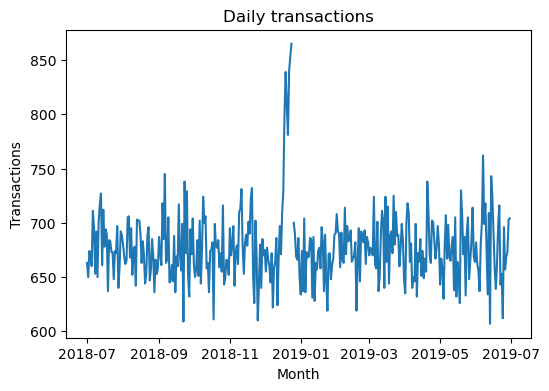

In [20]:
# Plot daily transactions to identify blank date

plt.style.use("default")

fig, ax = plt.subplots(figsize=(6,4))

ax.plot('date', 'transactions', data= daily_transactions_df)

ax.set_title("Daily transactions")
ax.set_xlabel("Month")
ax.set_ylabel("Transactions")

plt.show()

C:\Users\KINYUA\AppData\Local\Temp\ipykernel_244\4094926754.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=labels)


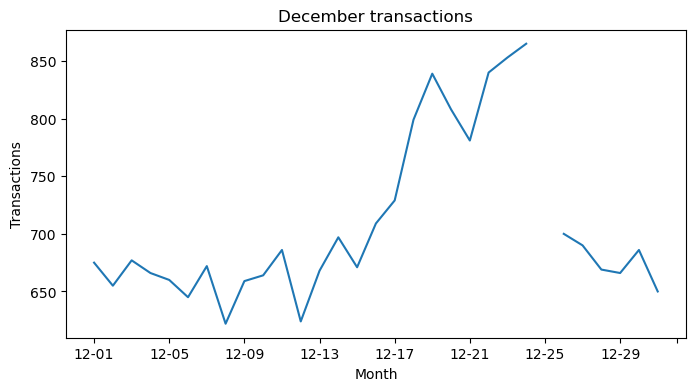

In [21]:
# Missing date in December 24-26. Plot December transactions alone to visualize

december_transactions = daily_transactions_df.loc[daily_transactions_df['date'
                                                            ].dt.month ==12]
# Plot December transactions

plt.style.use("default")

labels = ['12-01', '12-05', '12-09', '12-13', '12-17', '12-21', '12-25','12-29']

fig, ax = plt.subplots(figsize=(8,4))

ax.plot("date", "transactions", data=december_transactions)
ax.set_xlabel('Month')
ax.set_title("December transactions")
ax.set_ylabel("Transactions")
ax.set_xticklabels(labels=labels)

plt.show()

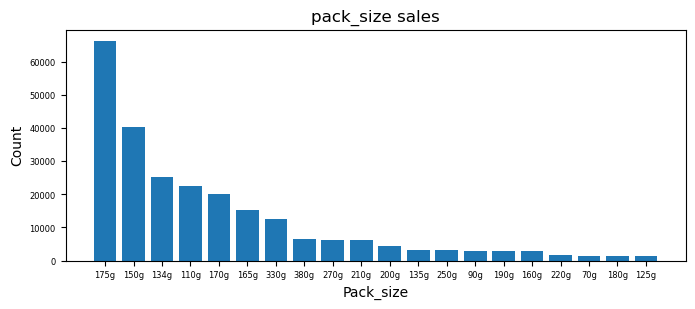

In [56]:
# Split product name column to obtain pack sizes and product brands

# Obtaining pack sizes

# Extract pack sizes using str.extract

chips_transactions_df['pack_size'] = chips_transactions_df["product_name"].str.extract('(\d+)'
                                            '([a-zA-Z]+)').apply(lambda x: ''.join(x), 
                                                            axis=1).str.lower()

# Plot pack size count to visualize their popularity

pack_size_count = chips_transactions_df["pack_size"].value_counts().reset_index()

fig, ax = plt.subplots(figsize=(8,3))

ax.bar("pack_size", "count", data=pack_size_count)

ax.set_title("pack_size sales")
ax.set_ylabel("Count")
ax.set_xlabel("Pack_size")
ax.tick_params(labelsize=6)

plt.show()

In [23]:
# Extract brand names using str.spilt

chips_transactions_df['brand']=\
            chips_transactions_df['product_name'].apply(lambda x: x.split()[0])

# Rename brands recorded with different names
chips_transactions_df['brand'].replace({'WW':'Woolworths', 'NCC':'Natural', 
                                        'Infzns':'Infuzions','Red':'RRD',
                                        'Dorito':'Doritos', 'Smith':'Smiths',
                                        'Grain':'GrnWves','Snbts':'Sunbites'}, inplace=True)

# transactions data frame ready for analysis

In [24]:
# Load customer details data

purchase_behavior = pd.read_csv(r"C:\Users\KINYUA\Downloads\QVI_purchase_behaviour.csv")

In [25]:
# Explore rows and columns

purchase_behavior.shape

(72637, 3)

In [26]:
purchase_behavior.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [27]:
# Check for null values

purchase_behavior.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [28]:
# Rename columns

purchase_behavior.rename(columns={'LYLTY_CARD_NBR':'loyalty_card_no', 
                                  'LIFESTAGE':'lifestage', 
                                  'PREMIUM_CUSTOMER':'premium_customer'}, inplace=True)

In [29]:
# Rename rows in lifestage column

purchase_behavior['lifestage'].replace({'YOUNG SINGLES/COUPLES':'Young singles/couples', 
                                        'YOUNG FAMILIES':'Young families', 
                                        'OLDER SINGLES/COUPLES': 'Older singles/couples',
                                        'MIDAGE SINGLES/COUPLES':'Midage singles/couples', 
                                        'NEW FAMILIES':'New families', 
                                        'OLDER FAMILIES':'Older families',
                                        'RETIREES':'Retirees'},inplace=True)



In [30]:
# Merge transactions and customer details df 

chips_sales = pd.merge(chips_transactions_df, purchase_behavior, 
                                       on='loyalty_card_no', how='left')

In [31]:
# Explore merged df
chips_sales.head()

,date,store_no,loyalty_card_no,transaction_id,product_no,product_name,product_qty,total_sales,pack_size,brand,lifestage,premium_customer
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175g,Natural,Young singles/couples,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175g,CCs,Midage singles/couples,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170g,Smiths,Midage singles/couples,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175g,Smiths,Midage singles/couples,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150g,Kettle,Midage singles/couples,Budget


In [32]:
# Check for nulls in the merged df

chips_sales.isnull().sum()

date                0
store_no            0
loyalty_card_no     0
transaction_id      0
product_no          0
product_name        0
product_qty         0
total_sales         0
pack_size           0
brand               0
lifestage           0
premium_customer    0
dtype: int64

In [33]:
# Check for duplicates

chips_sales.loc[chips_sales.duplicated()]


,date,store_no,loyalty_card_no,transaction_id,product_no,product_name,product_qty,total_sales,pack_size,brand,lifestage,premium_customer
116277,2018-10-01,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0,175g,Smiths,Older singles/couples,Premium


In [34]:
# Explore row 116276 and 116277 since duplicated() returns second row

chips_sales.loc[[116276,116277], :]

# Not a duplicate, customer bought different products in same transaction

,date,store_no,loyalty_card_no,transaction_id,product_no,product_name,product_qty,total_sales,pack_size,brand,lifestage,premium_customer
116276,2018-10-01,107,107024,108462,18,Cheetos Chs & Bacon Balls 190g,2,6.6,190g,Cheetos,Older singles/couples,Premium
116277,2018-10-01,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0,175g,Smiths,Older singles/couples,Premium


In [35]:
#  Chips df ready for analysis

chips_sales_df = chips_sales.copy()

# Save copy csv format

chips_sales_df.to_csv("C:/Users/KINYUA/Desktop/Python/chips_sales.csv", 
                     index=False, sep =',', encoding='utf-8')

### Exploratory Analysis

In [36]:
chips_transactions_df.head()

,date,store_no,loyalty_card_no,transaction_id,product_no,product_name,product_qty,total_sales,pack_size,brand
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175g,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175g,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170g,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175g,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150g,Kettle


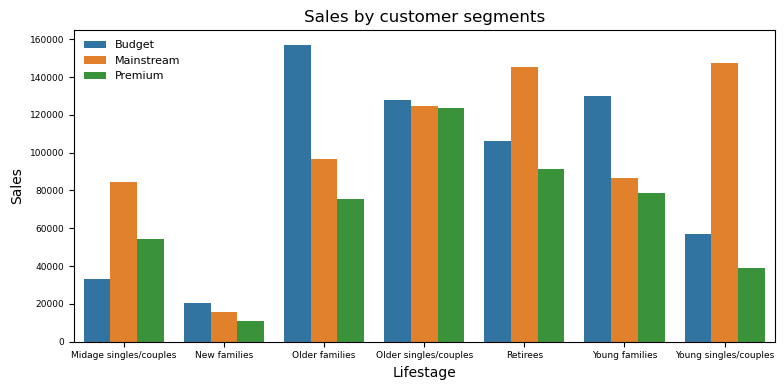

In [58]:
# Sales by customer segments

segment_purchases = chips_sales_df.groupby(['lifestage', 'premium_customer']
                                          )['total_sales'].sum().reset_index()

fig1, ax =plt.subplots(figsize=(8,4))

sns.barplot(x='lifestage', y='total_sales', hue= 'premium_customer', data=segment_purchases)
ax.tick_params(labelsize=6.5)
ax.set_ylabel('Sales')
ax.set_xlabel("Lifestage")
ax.set_title("Sales by customer segments")
plt.legend(frameon=False, fontsize=8)
plt.tight_layout()

plt.show()

# Most sales from Budget Older families and Mainstream Retirees and Young singles/couples

In [38]:
# Report to excel

segment_purchases.to_excel(r"C:\Users\KINYUA\Desktop\Python\segment_purchases.xlsx")

In [59]:
# Export figure

fig1.savefig(r"C:\Users\KINYUA\Desktop\Python\sales_segments.png", format='png', dpi=900)

In [40]:
# View a tabulated data for customer segments 

ct_sales = pd.crosstab(segment_purchases['lifestage'], segment_purchases['premium_customer'],
                       values=segment_purchases['total_sales'], aggfunc= 'sum', 
                          margins =True, margins_name ='Totals',
                                normalize =True).mul(100).round(1)
print(ct_sales)

# Budget Older families and Mainstream Young singles/couples and Retirees generate over 8% of sales each. Across 
# age segements, Older singles/couples and Retirees generate 40% of sales. Mainstream product segment 
# generate 39% of sales.


premium_customer        Budget  Mainstream  Premium  Totals
lifestage                                                  
Midage singles/couples     1.8         4.7      3.0     9.6
New families               1.1         0.9      0.6     2.6
Older families             8.7         5.3      4.2    18.2
Older singles/couples      7.1         6.9      6.8    20.8
Retirees                   5.9         8.0      5.1    19.0
Young families             7.2         4.8      4.4    16.3
Young singles/couples      3.2         8.2      2.2    13.5
Totals                    35.0        38.8     26.2   100.0


In [41]:
# Confirm if the higher sales in the segments above are due to more customers from those segments

customers_by_segment = pd.crosstab(chips_sales['lifestage'], chips_sales['premium_customer'], 
            values = chips_sales['loyalty_card_no'], aggfunc = 'nunique', 
            margins=True, margins_name ='Totals', normalize =True ).mul(100).round(1)
print(customers_by_segment)

# There are more Budget Older singles/families than Budget Older families. Budget Older families likely 
# purchase pricier brands/packs due to health and fitness concerns. Higher sales to Mainstream Young singles/
# couples and Retirees relate with higher customer numbers for these segments. Older singles/couples and 
# Retirees constitute 41% of customers.

premium_customer        Budget  Mainstream  Premium  Totals
lifestage                                                  
Midage singles/couples     2.1         4.6      3.3    10.0
New families               1.5         1.2      0.8     3.5
Older families             6.5         3.9      3.1    13.5
Older singles/couples      6.8         6.8      6.6    20.2
Retirees                   6.2         8.9      5.3    20.4
Young families             5.5         3.8      3.4    12.7
Young singles/couples      5.1        11.1      3.5    19.7
Totals                    33.7        40.3     26.0   100.0


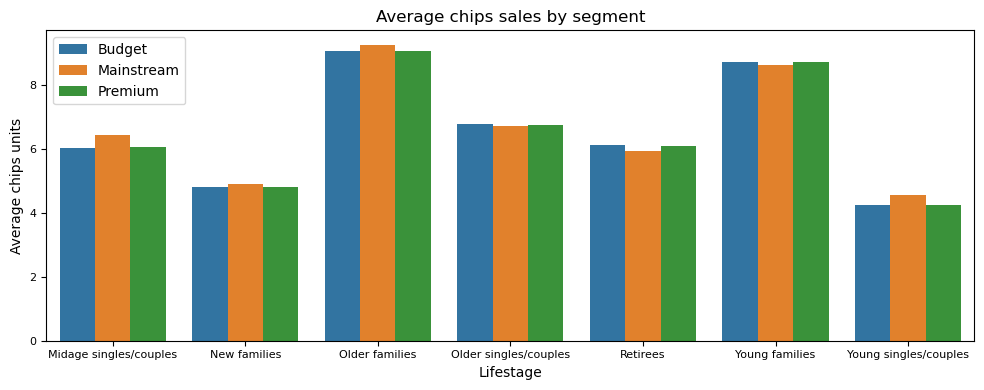

In [60]:
# Average number of units bought per customer by lifestage and Premium customer segment

units = chips_sales.groupby(['lifestage', 'premium_customer']).agg(
    average_units = ('product_qty','sum')).apply(lambda x: x /chips_sales.groupby(
    ['lifestage', 'premium_customer'])['loyalty_card_no'].nunique()).reset_index() 

fig2, ax = plt.subplots(figsize=(10,4))

sns.barplot(x="lifestage", y="average_units", data=units, hue="premium_customer")

ax.set_xlabel("Lifestage")
ax.set_ylabel("Average chips units")
ax.set_title("Average chips sales by segment")
ax.tick_params(labelsize=8)
plt.legend(loc=2)
plt.tight_layout()

plt.show()

# Leading bulk or repeat buyers are Older families and Young families. New families and Young 
# singles/couples buy the least

In [43]:
# Report

units.to_excel(r"C:\Users\KINYUA\Desktop\Python\units_average.xlsx", index=False)

In [61]:
# Export figure

fig2.savefig(r"C:\Users\KINYUA\Desktop\Python\ave_chips_segment.png", format='png', dpi=900)

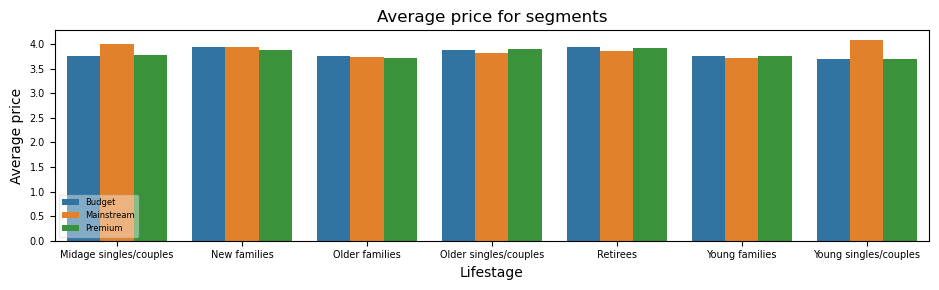

In [45]:
# Average price per unit for segments

average_price = chips_sales.groupby(['lifestage', 'premium_customer']).agg(
                avg_price = ('total_sales', 'sum')).apply(lambda x: x / chips_sales.groupby(
                ['lifestage', 'premium_customer'])['product_qty'].sum()).reset_index()

fig3, ax = plt.subplots(figsize=(9.5,3))

sns.barplot(x='lifestage', y='avg_price', data=average_price, hue='premium_customer')

ax.set_title("Average price for segments")
ax.set_xlabel("Lifestage")
ax.set_ylabel("Average price")
plt.tick_params(labelsize=7)
plt.legend(loc=3, framealpha=0.4, fontsize=6)
plt.tight_layout()

plt.show()

# Mainstream Midage and Young singles/couples pay the highest average price 

In [46]:
# Report

average_price.to_excel(r"C:\Users\KINYUA\Desktop\Python\average_price.xlsx", index=False)

In [47]:
# Export figure

fig3.savefig(r"C:\Users\KINYUA\Desktop\Python\ave_price_segment.png", format='png', dpi =900)

In [48]:
# Check whether the differences between average prices paid by Mainstream Midage and Young singles/couples
# is statistically significant

chips_sales['price'] = chips_sales['total_sales'] / chips_sales['product_qty']

mainstream_midage_young = chips_sales.loc[(chips_sales['lifestage'].isin(['Midage singles/couples',
                                                                        'Young singles/couples'])) &
                                        (chips_sales['premium_customer'] == 'Mainstream')]['price']
other_midage_young = chips_sales.loc[(chips_sales['lifestage'].isin(['Midage singles/couples',
                                                                        'Young singles/couples'])) &
                                        (chips_sales['premium_customer'] != 'Mainstream')]['price']

ttest = st.ttest_ind(mainstream_midage_young, other_midage_young, alternative='greater', equal_var=False)

print(ttest)


# The t-test results in a pValue less than 0.005; therefore the average price for chips paid by Mainstream 
# Young and Midage singles/couples is significantly higher than than paid by Budget and Premium customers 
# in the two lifestages.


TtestResult(statistic=37.6243885962295, pvalue=3.4836771165090696e-306, df=54791.09392740315)


In [49]:
# Deeper dive into Mainstream Young singles/couples to find out their favourite brands

# Create two segments for target and others
segment1= chips_sales[(chips_sales['lifestage']=='Young singles/couples') & 
                                    (chips_sales['premium_customer']=='Mainstream')]
other = chips_sales[~((chips_sales['lifestage']=='Young singles/couples') & 
                                    (chips_sales['premium_customer']=='Mainstream'))]

# Calculate sales quantity for the groups

segment1_quantity = segment1['product_qty'].sum()
other_quantity = other['product_qty'].sum()

# Calculate brand proportions for each segment
segment1_quantity_by_brand = segment1.groupby('brand')['product_qty'].sum()\
                                                                .reset_index()
segment1_quantity_by_brand['target_segment'] = segment1_quantity_by_brand['product_qty']\
                                                                    /segment1_quantity

other_quantity_by_brand = other.groupby('brand')['product_qty'].sum().reset_index()
other_quantity_by_brand['other_segment'] = other_quantity_by_brand['product_qty']/\
                                                                    other_quantity

# Merge target segment and other to form brand proportions df

brand_proportions = pd.merge(segment1_quantity_by_brand, other_quantity_by_brand,
                             on='brand')[['brand', 'target_segment', 'other_segment']]
brand_proportions['affinity_to_brand'] = brand_proportions['target_segment'] /\
                                                    brand_proportions['other_segment']

# Sort brand affinities in descending order

brand_proportions = brand_proportions.sort_values(by='affinity_to_brand', ascending=False)\
                                                                    .reset_index(drop=True)

print(brand_proportions)

# Mainstream young singles/couples are 23% more likely to buy Tyrrells than the rest of the customers. 
# Other brands preferred by the segment include Twisties, Doritos, Kettle, and Tostitos.
# Mainstream young singles/couples less likely to buy Burger (56%), Woolworths (51%) AND Sunbites (50%)

         brand  target_segment  other_segment  affinity_to_brand
0     Tyrrells        0.031553       0.025692           1.228095
1     Twisties        0.046184       0.037877           1.219319
2      Doritos        0.122761       0.101075           1.214553
3       Kettle        0.197985       0.165553           1.195897
4     Tostitos        0.045411       0.037978           1.195713
5     Pringles        0.119420       0.100635           1.186670
6         Cobs        0.044638       0.039049           1.143124
7    Infuzions        0.064679       0.057065           1.133435
8        Thins        0.060373       0.056986           1.059423
9      GrnWves        0.032712       0.031188           1.048873
10    Cheezels        0.017971       0.018647           0.963753
11      Smiths        0.096370       0.124584           0.773536
12      French        0.003948       0.005758           0.685569
13     Cheetos        0.008033       0.012067           0.665733
14         RRD        0.0

In [50]:
# Mainstream Young singles/couples also likely to pay more per purchase. Check if it is 
# due to buying larger chips pack-sizes

segment1= chips_sales[(chips_sales['lifestage']=='Young singles/couples') & 
                                    (chips_sales['premium_customer']=='Mainstream')]
other = chips_sales[~((chips_sales['lifestage']=='Young singles/couples') & 
                                    (chips_sales['premium_customer']=='Mainstream'))]

# Calculate sales quantity for the groups

segment1_quantity = segment1['product_qty'].sum()
other_quantity = other['product_qty'].sum()

# Calculate pack_size proportions for each segment
segment1_quantity_by_pack_size = segment1.groupby('pack_size')['product_qty'].sum()\
                                                                .reset_index()
segment1_quantity_by_pack_size['target_segment'] = segment1_quantity_by_pack_size['product_qty']\
                                                                    /segment1_quantity

other_quantity_by_pack_size = other.groupby('pack_size')['product_qty'].sum().reset_index()
other_quantity_by_pack_size['other_segment'] = other_quantity_by_pack_size['product_qty']/\
                                                                    other_quantity

# Merge target segment and other to for pack_size proportions df

pack_size_proportions = pd.merge(segment1_quantity_by_pack_size, other_quantity_by_pack_size,
                             on='pack_size')[['pack_size', 'target_segment', 'other_segment']]
pack_size_proportions['affinity_to_pack_size'] = brand_proportions['target_segment'] /\
                                                    brand_proportions['other_segment']

# Sort pack_size affinities in descending order

pack_size_proportions = pack_size_proportions.sort_values(by='affinity_to_pack_size', ascending=False)\
                                                                    .reset_index(drop=True)

print(pack_size_proportions)


# It is not true that Mainstream Young singles/couples pay higher average for chips because of a 
# predilection to buying larger sizes of chips. On the contrary, the segment is less likely to buy
# product sizes 190g and above compared to the rest of the population. Consequently, the higher prices
# paid could be due to a predilection to premium brandss, such as Tyrrells due to nutritional and 
# health concerns.


   pack_size  target_segment  other_segment  affinity_to_pack_size
0       110g        0.106280       0.089791               1.228095
1       125g        0.003009       0.006037               1.219319
2       134g        0.119420       0.100635               1.214553
3       135g        0.014769       0.013075               1.195897
4       150g        0.157598       0.163421               1.195713
5       160g        0.006404       0.012373               1.186670
6       165g        0.055652       0.062268               1.143124
7       170g        0.080773       0.080986               1.133435
8       175g        0.254990       0.270007               1.059423
9       180g        0.003589       0.006067               1.048873
10      190g        0.007481       0.012442               0.963753
11      200g        0.008972       0.018656               0.773536
12      210g        0.029124       0.025121               0.685569
13      220g        0.002926       0.006596               0.66

In [51]:
# Report

brand_proportions.to_excel(r"C:\Users\KINYUA\Desktop\Python\brand_affinity.xlsx")

In [52]:
# Report

pack_size_proportions.to_excel(r"C:\Users\KINYUA\Desktop\Python\packsize_proportions.xlsx")

In [53]:
#Report

# Quantity of chips purchased by lifestage and premium_customer

qty_ct = pd.crosstab(chips_sales['lifestage'], chips_sales['premium_customer'],
                     values =chips_sales['product_qty'], aggfunc ='sum', 
                     normalize= True, margins=True, margins_name='Total').mul(100).round(1)
print(qty_ct)

premium_customer        Budget  Mainstream  Premium  Total
lifestage                                                 
Midage singles/couples     1.9         4.5      3.1    9.5
New families               1.1         0.9      0.6    2.6
Older families             8.9         5.5      4.3   18.7
Older singles/couples      7.0         6.9      6.7   20.7
Retirees                   5.7         8.0      4.9   18.7
Young families             7.3         4.9      4.4   16.7
Young singles/couples      3.3         7.7      2.2   13.2
Total                     35.2        38.4     26.3  100.0


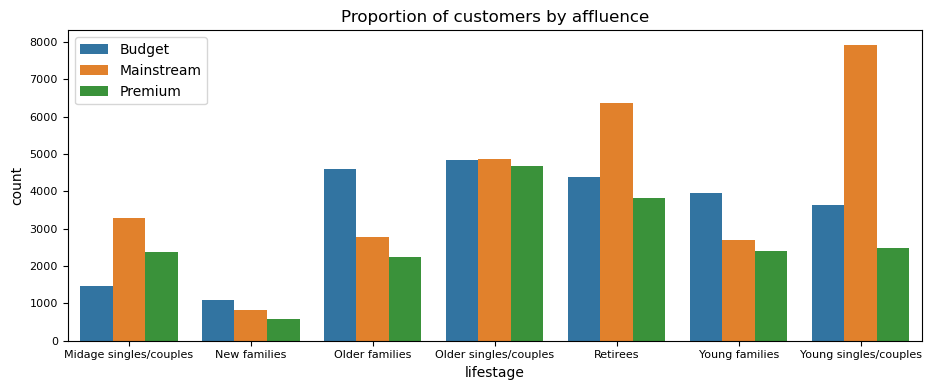

In [54]:
# Report

customers_by_affluence = chips_sales.groupby(['lifestage', 'premium_customer']).agg(
    count = ('loyalty_card_no', 'nunique')).reset_index()

fig, ax = plt.subplots(figsize=(9.5, 4))

sns.barplot(x='lifestage', y='count', data=customers_by_affluence, hue='premium_customer')

plt.tick_params(labelsize=8)
plt.title("Proportion of customers by affluence")
plt.tight_layout()
plt.legend(title='')
plt.show()


In [55]:
# Report
fig.savefig(r"C:\Users\KINYUA\Desktop\Python\customers_affluence.png", format='png', dpi=900)